In [14]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [ ]:
relevant_cols = ['Highest Parent Education']
parent_education_df = class_df[relevant_cols].dropna()

parent_education_df.head(10)

In [17]:
parent_education = parent_education_df.groupby('Highest Parent Education')['Highest Parent Education'].count()

parent_education

Highest Parent Education
Bachelors           36
Diploma              4
High School          6
Masters             37
PhD                  8
Technical Degree     2
Name: Highest Parent Education, dtype: int64

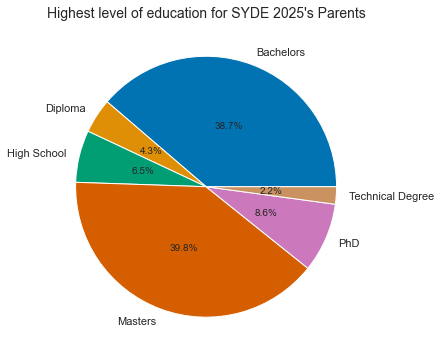

In [18]:
pie, ax = plt.subplots(figsize=[10,6])
labels = parent_education.keys()
plt.pie(x=parent_education, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Highest level of education for SYDE 2025's Parents", fontsize=14);
pie.savefig("outputs/parent_education.png")

In [ ]:
parent_education_df['Number of people'] = parent_education_df.groupby(['Highest Parent Education'])['Highest Parent Education'].transform('count')
parent_education_df = parent_education_df.drop_duplicates(subset=['Highest Parent Education', 'Number of people'], keep='first')

parent_education_df

In [ ]:
total_respondants = parent_education_df['Number of people'].sum()
parent_education_df['Percentage of People'] = (parent_education_df['Number of people'] / total_respondants) * 100
parent_education_df = parent_education_df.reset_index()
parent_education_df

In [21]:
total_respondants

93

Text(0, 0.5, 'Percentage of Respondents (%)')

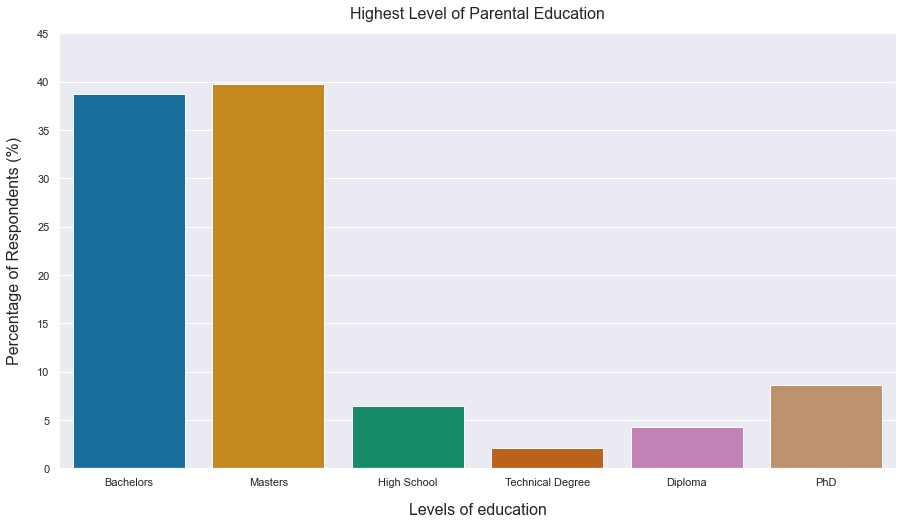

In [22]:
plt.figure(figsize=(15, 8))
plt.title("Highest Level of Parental Education", fontsize=16, y=1.02)
sns.set_theme(palette="colorblind")
ax = sns.barplot(x=parent_education_df['Highest Parent Education'],y=parent_education_df['Percentage of People'], data=parent_education_df)
ax.set(ylim=(0, 45))
plt.xlabel("Levels of education", labelpad=15, fontsize=16)
plt.ylabel("Percentage of Respondents (%)", labelpad=15, fontsize=16)